In [146]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import string

In [14]:
Fake_news=pd.read_csv('C:\\Users\\mm\\Desktop\\Fake.csv')
True_news=pd.read_csv('C:\\Users\\mm\\Desktop\\True.csv')

In [15]:
Fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [16]:
True_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
Fake_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [18]:
True_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [19]:
True_news['class']=1
Fake_news['class']=0

In [20]:
Fake_news=Fake_news.drop(['title','subject','date'],axis=1)

In [21]:
Fake_news

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [22]:
True_news=True_news.drop(['title','subject','date'],axis=1)

In [23]:
True_news

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [24]:
True_news.shape

(21417, 2)

In [25]:
Fake_news.shape

(23481, 2)

In [43]:
All_data=pd.concat([Fake_news,True_news],axis=0)

In [44]:
All_data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [45]:
All_data.isna().sum()

text     0
class    0
dtype: int64

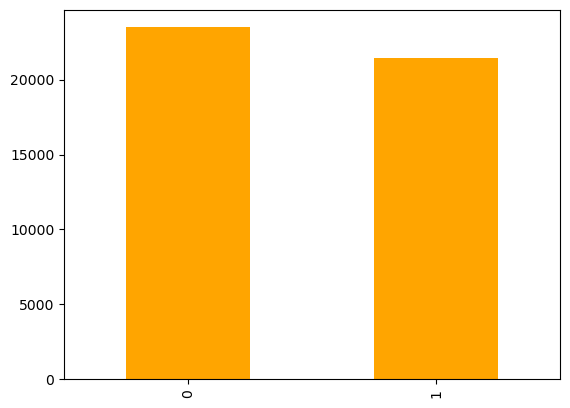

In [77]:
asd=All_data['class'].value_counts()
asd.plot.bar(color="orange")
plt.show()

C:\Users\mm\AppData\Local\Temp\ipykernel_19776\2446155837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(All_data['class'],color='red')


<Axes: xlabel='class', ylabel='Density'>

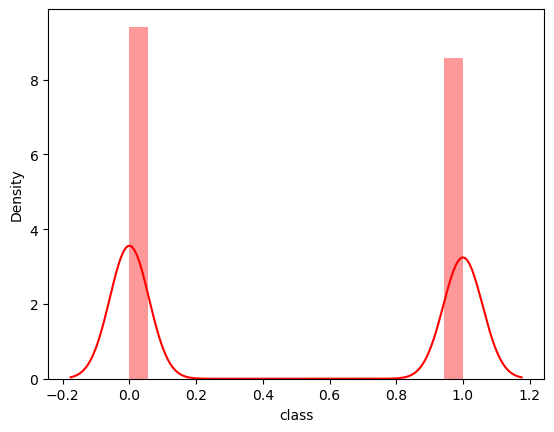

In [80]:
sns.distplot(All_data['class'],color='red')

In [81]:
training_data=All_data['text']
testing_data=All_data['class']

In [82]:
x_train,x_test,y_train,y_test=train_test_split(training_data,testing_data,random_state=42,test_size=0.2)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [88]:
Tree=DecisionTreeClassifier()
Tree.fit(xv_train,y_train)

DecisionTreeClassifier()

In [90]:
Tree.predict(xv_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [92]:
Tree.score(xv_train,y_train)

0.9999721588061696

In [96]:
logs=LogisticRegression()
logs.fit(xv_train,y_train)

LogisticRegression()

In [97]:
logs.score(xv_train,y_train)

0.9913135475249178

In [99]:
logs.predict(xv_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [103]:
Boost=GradientBoostingClassifier(random_state=0)
Boost.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [104]:
Boost.score(xv_train,y_train)

0.9970488334539785

In [105]:
Boost.predict(xv_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)